#### IMPORT LIBRARIES

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

---

#### IMPORT DATASET

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m')

In [3]:
ice_cream_heater_df = pd.read_csv('ice_cream_vs_heater.csv',
                                  parse_dates = [0], index_col = 0,
                                  squeeze = True, date_parser = parser)

In [5]:
ice_cream_heater_df = ice_cream_heater_df.asfreq(pd.infer_freq(ice_cream_heater_df.index))

In [7]:
heater_series = ice_cream_heater_df.heater

In [8]:
heater_series

Month
2004-01-01    27
2004-02-01    18
2004-03-01    14
2004-04-01    13
2004-05-01    13
              ..
2020-02-01    34
2020-03-01    25
2020-04-01    25
2020-05-01    27
2020-06-01    24
Freq: MS, Name: heater, Length: 198, dtype: int64

---

#### CREATE INITIAL PLOT

In [17]:
def plot_series(series):
    plt.figure(figsize = (16,6))
    plt.plot(heater_series, color = 'red')
    plt.ylabel('Search Frequency for "Heater"', fontsize = 16)
    plt.xlabel('Years', fontsize = 16)

    for year in range(2004, 2021):
        plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.2)

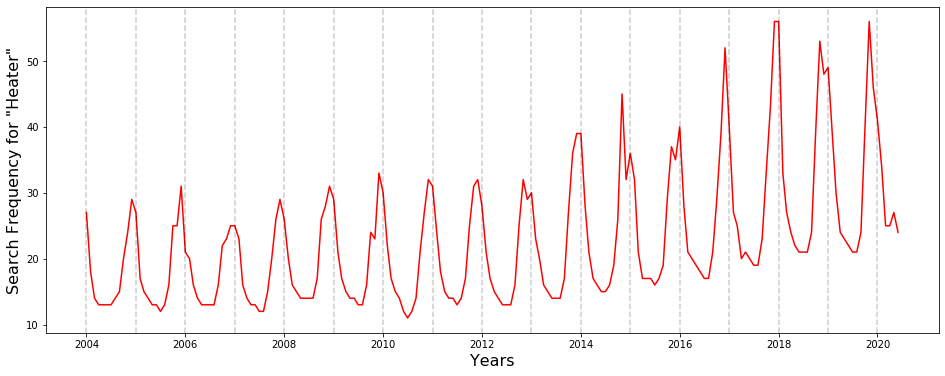

In [18]:
plot_series(heater_series)

---

#### NORMALIZATION - Z-SCORE

As seen from the above plot, our Y-Axis starts from 10, so we need to get the 0 in the plot, that will be taken care by NORMALIZATION.

In [19]:
# avg = Mean
# dev = Standard Deviation
avg, dev = heater_series.mean(), heater_series.std()

In [20]:
heater_series.head()

Month
2004-01-01    27
2004-02-01    18
2004-03-01    14
2004-04-01    13
2004-05-01    13
Freq: MS, Name: heater, dtype: int64

In [21]:
heater_series = (heater_series - avg) / dev

In [22]:
heater_series.head()

Month
2004-01-01    0.429490
2004-02-01   -0.489299
2004-03-01   -0.897650
2004-04-01   -0.999738
2004-05-01   -0.999738
Freq: MS, Name: heater, dtype: float64

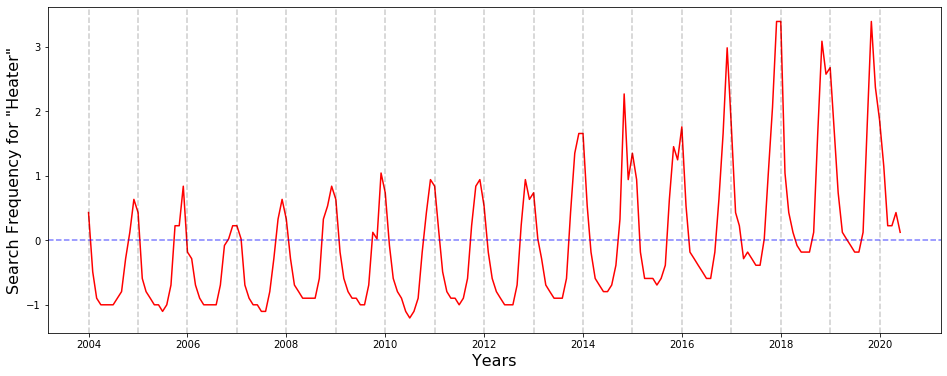

In [25]:
plot_series(heater_series)
plt.axhline(0, linestyle = '--', color = 'b', alpha = 0.5)

---

#### TAKE FIRST DIFFERENCE TO REMOVE TREND

In [27]:
heater_series.isna().sum()

0

In [28]:
# .dropna() will remove the first value, which becomes NaN when we do differencing.
heater_series = heater_series.diff().dropna()

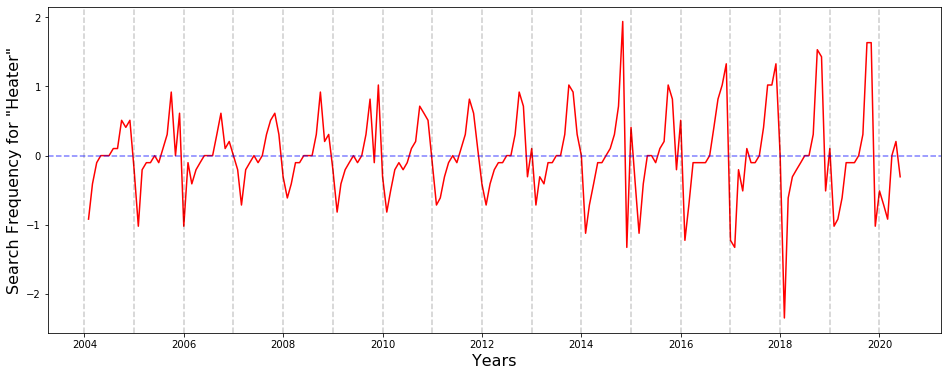

In [30]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='b', alpha=0.5)

---

#### REMOVING INCREASING VOLATILITY

We can see from our plot there is some sort of VOLATILITY in our data towards the end of period.

Initial Volatility is lower and increases at the end.

Approach: 

1. Take STANDARD DEVIATION within each year.

2. Divide each of the DATA Point with the STANDARD DEVIATION of that Year, which the Data Point belongs to.

In [31]:
annual_volatility = heater_series.groupby(heater_series.index.year).std()

In [32]:
annual_volatility

Month
2004    0.415481
2005    0.474527
2006    0.400148
2007    0.359839
2008    0.396182
2009    0.499810
2010    0.459566
2011    0.443924
2012    0.471104
2013    0.503587
2014    0.855743
2015    0.569441
2016    0.719843
2017    0.830886
2018    0.987221
2019    0.892991
2020    0.426657
Name: heater, dtype: float64

In [33]:
heater_annual_vol = heater_series.index.map(lambda d: annual_volatility.loc[d.year])

In [34]:
heater_annual_vol

Float64Index([0.41548104705328814, 0.41548104705328814, 0.41548104705328814,
              0.41548104705328814, 0.41548104705328814, 0.41548104705328814,
              0.41548104705328814, 0.41548104705328814, 0.41548104705328814,
              0.41548104705328814,
              ...
               0.8929910269067826,  0.8929910269067826,  0.8929910269067826,
               0.8929910269067826, 0.42665652301411977, 0.42665652301411977,
              0.42665652301411977, 0.42665652301411977, 0.42665652301411977,
              0.42665652301411977],
             dtype='float64', name='Month', length=197)

In [35]:
heater_series = heater_series / heater_annual_vol

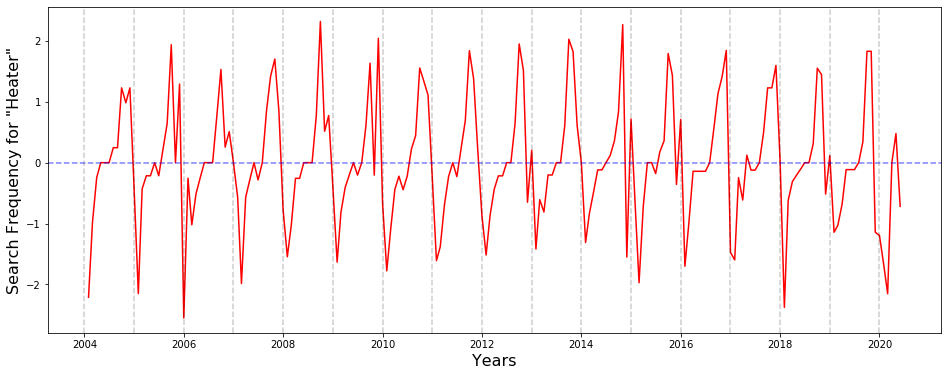

In [37]:
plot_series(heater_series)
plt.axhline(0, linestyle = '--', color = 'b', alpha = 0.5)

---

#### REMOVING SEASONALITY

APPROACH:

1. To remove SEASONALITY, we will take AVERAGE(MEAN) of each month for all years. So we will take all January MEAN for 17 years.

In [38]:
month_avgs = heater_series.groupby(heater_series.index.month).mean()

In [39]:
month_avgs

Month
1    -0.428360
2    -1.483129
3    -1.063595
4    -0.442926
5    -0.121663
6    -0.128425
7    -0.107093
8     0.075720
9     0.544638
10    1.613170
11    1.183118
12    0.491641
dtype: float64

In [40]:
heater_month_avg = heater_series.index.map(lambda d: month_avgs.loc[d.month])

In [41]:
heater_month_avg

Float64Index([ -1.4831292771766649,  -1.0635953355687688, -0.44292637101368243,
              -0.12166261572164787, -0.12842542811874375, -0.10709260508002617,
               0.07572031336904017,   0.5446384049209763,   1.6131699911888606,
                1.1831180641276993,
              ...
                0.5446384049209763,   1.6131699911888606,   1.1831180641276993,
                0.4916411242912192,  -0.4283597874466263,  -1.4831292771766649,
               -1.0635953355687688, -0.44292637101368243, -0.12166261572164787,
              -0.12842542811874375],
             dtype='float64', name='Month', length=197)

In [42]:
heater_series = heater_series - heater_month_avg

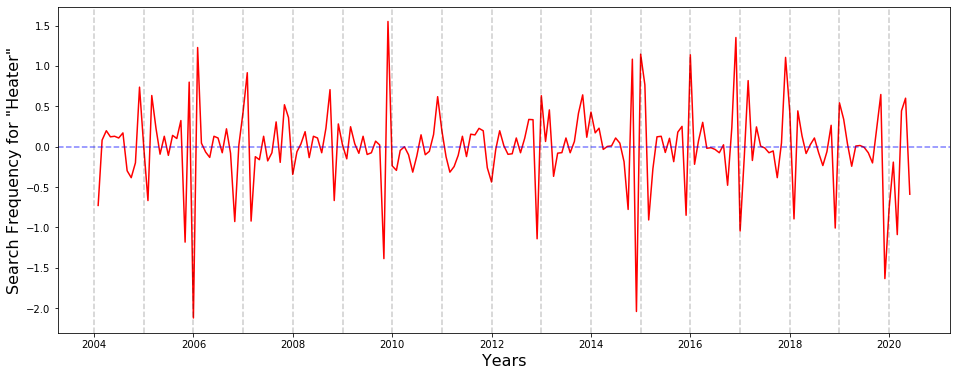

In [43]:
plot_series(heater_series)
plt.axhline(0, linestyle = '--', color = 'b', alpha = 0.5)

In [44]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(heater_series, autolag = 'AIC')
pd.DataFrame(test_result)

,0
0,-14.280161
1,0.0
2,1
3,195
4,"{'1%': -3.464337030867007, '5%': -2.8764787990..."
5,242.307723


---

#### PERFORM ADFULLER TEST TO CHECK STATIONARITY & TREND

In [58]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(heater_series, autolag = 'AIC')
print("1. ADF: ", dftest[0])
print("2. P-Value: ", dftest[1])
print("3. Num. of Lags: ", dftest[2])
print("4. Num. of Observations used for ADF Regression and Critical Values Calculations: ", dftest[3])
print("5. Critical Values: ", dftest[4])
if dftest[1] > 0.05:
    print('TIME-SERIES is NOT STATIONARY')
else:
    print('TIME-SERIES is STATIONARY')

1. ADF:  -14.280161378347378
2. P-Value:  1.3281990332221284e-26
3. Num. of Lags:  1
4. Num. of Observations used for ADF Regression and Critical Values Calculations:  195
5. Critical Values:  {'1%': -3.464337030867007, '5%': -2.876478799035722, '10%': -2.574733103221565}
TIME-SERIES is STATIONARY
